In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [2]:
Titanic=pd.read_csv(r"C:\Users\Dell\Downloads\Titanic dataset.csv")

In [3]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pre processing

dropping features not necessary for the analysis

In [4]:
Titanic.drop(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [5]:
Titanic

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S
...,...,...,...,...
886,0,male,27.0,S
887,1,female,19.0,S
888,0,female,NaN,S
889,1,male,26.0,C


BASIC EDA

In [6]:
Titanic.columns

Index(['Survived', 'Sex', 'Age', 'Embarked'], dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

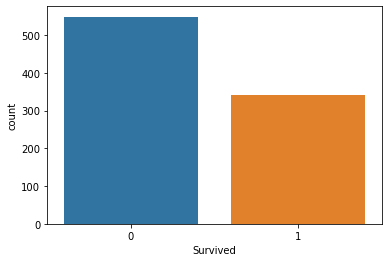

In [7]:
sns.countplot(x='Survived', data= Titanic)

the proportion of those that did not survive were more than those that survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

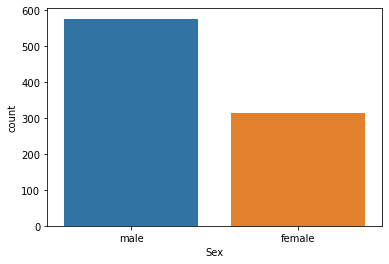

In [8]:
sns.countplot(x='Sex', data= Titanic)

The proportion of males that embarked were more than females.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

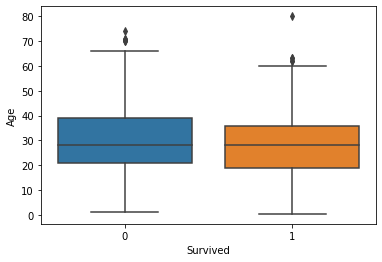

In [9]:
sns.boxplot(x='Survived', y='Age', data=Titanic)

people within the age range of 30-40 have the almost the sme rate of survival and non survival, while older people have wide range of non survival

<AxesSubplot:xlabel='Embarked', ylabel='count'>

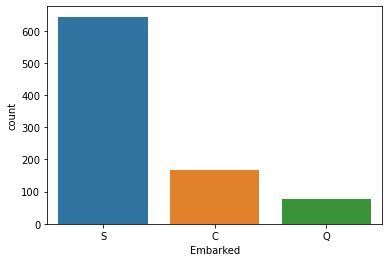

In [10]:
sns.countplot(x='Embarked', data=Titanic)

Those that embarked from S port were higher in proportion comapared to those that embarked from C port thn those that embarked from  port were the least.

In [11]:
Titanic.shape

(891, 4)

In [12]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [13]:
Titanic.describe()

,Survived,Age
count,891.000000,714.000000
mean,0.383838,29.699118
std,0.486592,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


In [14]:
Titanic.describe(include='all')

,Survived,Sex,Age,Embarked
count,891.000000,891,714.000000,889
unique,NaN,2,NaN,3
top,NaN,male,NaN,S
freq,NaN,577,NaN,644
mean,0.383838,NaN,29.699118,NaN
std,0.486592,NaN,14.526497,NaN
min,0.000000,NaN,0.420000,NaN
25%,0.000000,NaN,20.125000,NaN
50%,0.000000,NaN,28.000000,NaN
75%,1.000000,NaN,38.000000,NaN


In [15]:
Titanic['Survived'].mean

<bound method Series.mean of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [16]:
Titanic['Sex'].mean

<bound method Series.mean of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [17]:
Titanic['Age'].mean

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [18]:
Titanic['Embarked'].mean

<bound method Series.mean of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

Converting Object Datatype to float

In [19]:
Titanic['Sex']= pd.to_numeric(Titanic['Sex'], errors = 'coerce')
Titanic['Embarked']= pd.to_numeric(Titanic['Embarked'], errors = 'coerce')

In [20]:
Titanic.isnull().sum()

Survived      0
Sex         891
Age         177
Embarked    891
dtype: int64

In [21]:
mean_Age=np.round(Titanic.Age.mean())
mean_Age

30.0

<AxesSubplot:xlabel='Age', ylabel='Density'>

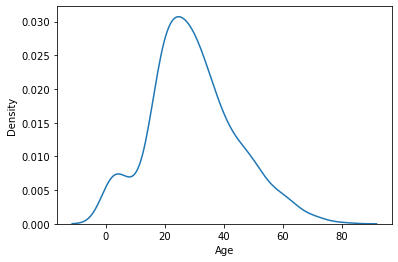

In [22]:
sns.kdeplot(Titanic.Age)

In [23]:
Titanic.Age.fillna(mean_Age,inplace=True)

In [24]:
Titanic.replace([np.inf, -np.inf], np.nan,inplace=True)
Titanic.fillna(1, inplace=True)

In [25]:
Titanic.describe(include='all')

,Survived,Sex,Age,Embarked
count,891.000000,891.0,891.000000,891.0
mean,0.383838,1.0,29.758889,1.0
std,0.486592,0.0,13.002570,0.0
min,0.000000,1.0,0.420000,1.0
25%,0.000000,1.0,22.000000,1.0
50%,0.000000,1.0,30.000000,1.0
75%,1.000000,1.0,35.000000,1.0
max,1.000000,1.0,80.000000,1.0


Model Building

Data Preprocesing

In [26]:
Titanic.head()

,Survived,Sex,Age,Embarked
0,0,1.0,22.0,1.0
1,1,1.0,38.0,1.0
2,1,1.0,26.0,1.0
3,1,1.0,35.0,1.0
4,0,1.0,35.0,1.0


In [27]:
X=Titanic.drop(['Survived'], axis='columns')
y=Titanic['Survived']

In [28]:
X.head()

,Sex,Age,Embarked
0,1.0,22.0,1.0
1,1.0,38.0,1.0
2,1.0,26.0,1.0
3,1.0,35.0,1.0
4,1.0,35.0,1.0


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

One hot encoding

In [30]:
pd.get_dummies(X)

,Sex,Age,Embarked
0,1.0,22.0,1.0
1,1.0,38.0,1.0
2,1.0,26.0,1.0
3,1.0,35.0,1.0
4,1.0,35.0,1.0
...,...,...,...
886,1.0,27.0,1.0
887,1.0,19.0,1.0
888,1.0,30.0,1.0
889,1.0,26.0,1.0


In [31]:
X.shape

(891, 3)

spliting the data into training and test set

In [32]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1234)

Model Training

using logistic regression

In [33]:
logisticmodel=LogisticRegression()

In [34]:
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [35]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

making a prediction

In [36]:
logistic_prediction=logisticmodel.predict(X_test)

Model Evaluation

In [37]:
y_pred=pd.Series(logisticmodel.predict(X_test))
y_test= y_test.reset_index(drop=True)
z=pd.concat([y_test, y_pred], axis=1)
z.columns= ['True', 'Prediction']
z.head()

,True,Prediction
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0


Using a confusion matrix

In [38]:
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize=10)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize=10)
    plt.title('A confusion matrix')

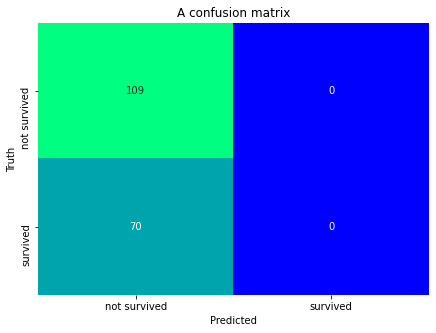

In [39]:
ConfusionMatrix(y_test, logistic_prediction, label=['not survived', 'survived'])

interpretation of the Logistic Regression model evaluation peformance

we have 109 True negatives, which predicted that the clients will not survive the shipwreck and they did not suvrive the shipwreck
we have 70 false negatives, which predicted that the clients will not survive but the clients survived the shipwreck

Checking the accuracy

In [40]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6089385474860335

the accuracy of the model is 60%

using f1 score

In [41]:
metrics.f1_score(y_test, logistic_prediction)

0.0

using Naive Bayes Model

In [42]:
naivemodel=GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [43]:
naivemodel_prediction=naivemodel.predict(X_test)
naivemodel_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

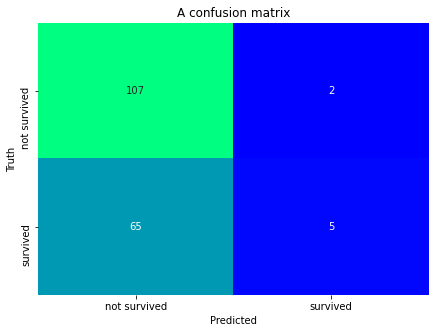

In [44]:
ConfusionMatrix(y_test, naivemodel_prediction, label =['not survived', 'survived'])

Interpretation of the Naive Bayes model evaluation performance

we have 107 true negatives,predicting that the clients will not survive the shipwreck and they did not survive
we have 65 false negatives, predicting that the clients will not survive but they did survived.
we have 2 false positives, predicting that the clients will survive but they did not survive
we have 5 true positives, predicting that the clients will survive and they did survived.

In [ ]:
checking the model accuracy

In [ ]:
metrics.accuracy_score(y_test, naivemodel_prediction)

the model accuracy is 62%

using f1 score

In [54]:
metrics.f1_score(y_test, naivemodel_prediction)

0.12987012987012989

Random Forest Model

In [49]:
randomforestmodel=RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)
randomforestmodel_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

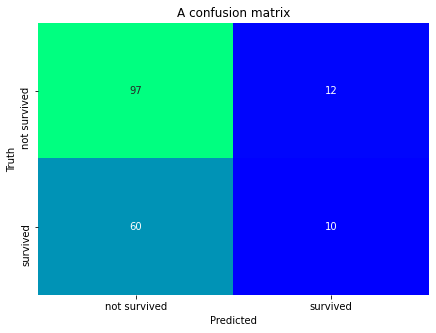

In [51]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ['not survived', 'survived'])

In [ ]:
we have 94 true negatives,predicting that the clients will not survive the shipwreck and they did not survive
we have 58 false negatives, predicting that the clients will not survive but they did survived.
we have 15 false positives, predicting that the clients will survive but they did not survive
we have 12 true positives, predicting that the clients will survive and they did survived.

Evaluation metrics 

In [52]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.5977653631284916

the accuracy is 59%

In [53]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.21739130434782608

In [59]:
xgbboostmodel = XGBClassifier(use_label_encoder=False)
xgbboostmodel = xgboostmodel.fit(X_train, y_train)

[19:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
xgbboostmodel_prediction= xgboostmodel.predict(X_test)
xgbboostmodel_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

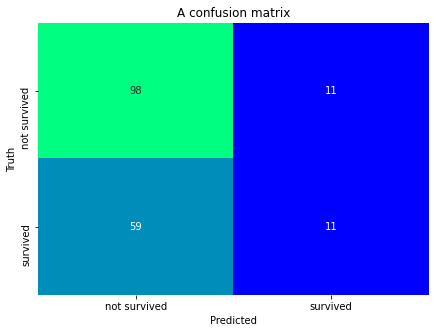

In [61]:
ConfusionMatrix(y_test, xgbboostmodel_prediction, label= ['not survived', 'survived'])

we have 98 true negatives,predicting that the clients will not survive the shipwreck and they did not survive
we have 59 false negatives, predicting that the clients will not survive but they did survived.
we have 11 false positives, predicting that the clients will survive but they did not survive
we have 11 true positives, predicting that the clients will survive and they did survived.

In [62]:
metrics.accuracy_score(y_test, xgbboostmodel_prediction)

0.6089385474860335

In [64]:
metrics.f1_score(y_test, xgbboostmodel_prediction)

0.2391304347826087